# Homework 2

### Kaggle Housing Prices Competition

First, we import any packages and functions that may be useful in cleaning and visualizing the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
sns.set(style='ticks', palette='Set2')
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)

## Cleaning Training Data

We now import the training dataset provided by Kaggle:

In [2]:
raw_data = pd.read_csv('train.csv', header = 0, index_col = 'Id')
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Many of these variables seem to have missing and categorical data; upon examining the codebook and the dataframe head we previously printed, we can see that this comes from entries having "NA" entered where a house does not have a given feature. We'll get to this later.

At the moment, we want to convert the categorical variables into usable, numeric variables. We'll make two lists of variables for the time being.

At the end, we'll create a variable for the natural log of the sale price, which can help us scale our data.

In [3]:
category_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 
                 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
                 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 
                 'SaleType', 'SaleCondition']

quality_vars = ['ExterQual', 'ExterCond', 
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
                 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

raw_data['lnSalePrice'] = np.log(raw_data['SalePrice'])

We'll now begin with our first dataset, in which we replace all categorical variables with dummy variables, where 1 represents a house having that characteristic and 0 represents one without the characteristic. We can then drop the previous variables, which are coded as strings and are now unnecessary.

In [4]:
train1 = raw_data

for var in category_vars:
    tempdat = pd.get_dummies(train1[var], prefix = var)
    train1 = pd.concat([train1, tempdat], axis = 1)
    
for var in quality_vars:
    tempdat = pd.get_dummies(train1[var], prefix = var)
    train1 = pd.concat([train1, tempdat], axis = 1)
    
train1 = train1.drop(category_vars, 1)
train1 = train1.drop(quality_vars, 1)
    
train1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lnSalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Adj

In [5]:
train1.columns[train1.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

There are now only three variables with null values. Upon examining the codebook, we see that these are numeric values, so any missing values here are mean that the house does not have that characteristic at all. For "Garage Year Built", we know our other variables show whether a garage actually exists.  Since "Garage Year Built" likely has a minimal effect on housing prices (aside from the year the entire house was built), we will replace this missing value with the year the house was built, and let the other variables related to the garage's qualities (and existence) determine the bulk of the housing price that is determined by the garage. 

For "Lot Frontage" and "Masonry Veneer Area", we will replace this with zero, and create a new variable serving as a dummy for any houses without any area touching the street.

In [6]:
values = {'LotFrontage': 0, 'GarageYrBlt': train1['YearBuilt'], 'MasVnrArea': 0}
train1 = train1.fillna(value = values)

### Alternative Cleaning Method

In this second training set, we will make a few slight changes. Instead of breaking up the "quality" ratings into separate dummy variable categories, we will rank them from 1-5 (Poor-Excellent). We do this to help with Lasso and Ridge constraints on the variables - with fewer variables describing housing quality, it may be that the scale will actually help general reactions (eg. "Oh this house just looks nicer than the other one") play a larger role in housing prices.

In [7]:
train2 = raw_data

for var in category_vars:
    tempdat = pd.get_dummies(train2[var], prefix = var)
    train2 = pd.concat([train2, tempdat], axis = 1) 

for var in quality_vars:
    choice_scale = [train2[var] =='Ex', train2[var] =='Gd', train2[var] =='TA', 
                    train2[var] =='Fa', train2[var] =='Po']
    choices = [5, 4, 3, 2, 1]
    train2[str(var) + '_qual'] = np.select(choice_scale, choices, default = np.NaN)
    
train2 = train2.drop(category_vars, 1)
train2 = train2.drop(quality_vars, 1)
    
train2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lnSalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Adj

We see there exists the same problem with missing values as in the first training dataset, and do the same as before:

In [8]:
train2.columns[train2.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtQual_qual',
       'BsmtCond_qual', 'BsmtExposure_qual', 'FireplaceQu_qual',
       'GarageQual_qual', 'GarageCond_qual', 'PoolQC_qual'],
      dtype='object')

We can see that, in addition to the same variables as before, a few new variables also have missing values. From checking the codebook, and our code, we can see that these all have missing values when the house doesn't have the given characteristic. With the reasoning that (for example) a low-quality fireplace is better than not having one at all, we replace these other variables with a value of 0, changing the scale from 1-5 to 0-5.

In [9]:
values = {'LotFrontage': 0, 'GarageYrBlt': train2['YearBuilt'], 'MasVnrArea': 0}
train2 = train2.fillna(value = values)
train2 = train2.fillna(value = 0)
print(train2.shape)

(1460, 267)






## Description and Visualization

First, we look at the sale price distribution. This will be the same for both train1 and train2, so we'll just examine it once:

Text(0.5,0,'Sale Price, Dollars')

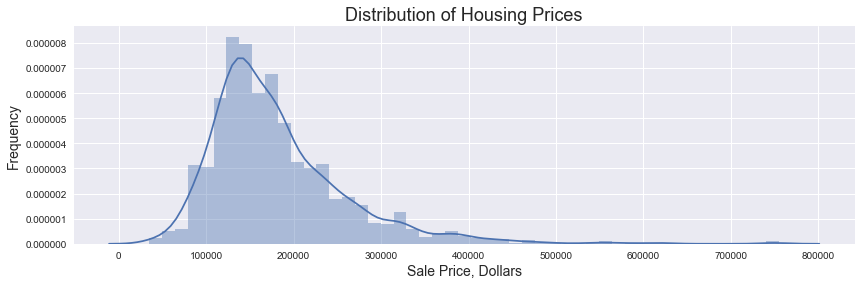

In [10]:
f, ax = plt.subplots(figsize = (14,4))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.distplot(train1.SalePrice, ax = ax)
plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Sale Price, Dollars", fontsize = 14)

This appears to be approximately distributed as a log-normal distribution. We examine the distribution of the log of sales price and note that it appears to be normal. Predicting on a logarithmic scale may help with outlier prediction.

Text(0.5,0,'Natural Log of Sale Price, Dollars')

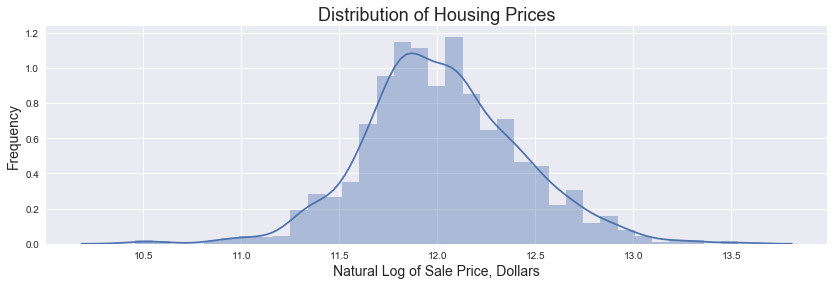

In [11]:
f, ax = plt.subplots(figsize = (14,4))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.distplot(train1.lnSalePrice, ax = ax)
plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Natural Log of Sale Price, Dollars", fontsize = 14)

In [12]:
train1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lnSalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Adj

In [13]:
train2.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lnSalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Adj

# Modeling

Now that we've cleaned our data, we import a few things that will be useful in modeling the data.

In [178]:
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV as ENCV
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.tree import DecisionTreeRegressor as DTR
scaler = StandardScaler()

We can now format our data in a way that will be compatible with SciKit Learn's programs. We have made two different outcomes, the Sale Price and the natural log of the Sale Price, and will be modeling with both (and calculating the Mean Squared Error for the "LN" variable only after raising it as a power of "e" to get the true price - we want to see if the linear variables have a different effect when the outcome data is scaled differently).

Remember - we have two different datasets based upon two different cleaning methods. We'll loop through the same regressions for each and see which way is better for predicting the housing prices.

In [15]:
outcomes = ['SalePrice', 'lnSalePrice']
X_train1 = train1.drop(outcomes, 1)
X_train2 = train2.drop(outcomes, 1)
y_train = train1['SalePrice']
lny_train = train1['lnSalePrice']

## Model 1 - Linear Regression

### Simple Linear Model

We start off with a linear regression model. Just to check to make sure our linear model is working correctly, we'll examine how it runs with our normal and transformed outcome variables, as well as our two different datasets (created, as explained above, with either dummies or a scale rating for certain variables).

#### Sample Linear Models

Below, we set a linear model to run a Stochastic Gradient Descent Regression. At the moment, we have set a tolerance level of .0000001 and a learning rate of .000000001 (the log-linear model has problems for higher learning rates).

We will return the RMSE, or Root Mean Squared Error, as this shows us the error in the scale of our predicted outcome.

In [105]:
linear_model = SGDR(tol=.0000001, eta0=.000000001)

In [106]:
linear_model.fit(X_train1, y_train)
predicted_y1 = linear_model.predict(X_train1)
mse1 = MSE(y_train, predicted_y1)
print("RMSE: {}".format(np.sqrt(mse1)))

RMSE: 56174.25556991107


In [107]:
linear_model.fit(X_train2, y_train)
predicted_y2 = linear_model.predict(X_train2)
mse2 = MSE(y_train, predicted_y2)
print("RMSE: {}".format(np.sqrt(mse2)))

RMSE: 58610.52792466581


In [114]:
linear_model.fit(X_train1, lny_train)
predicted_lny1 = linear_model.predict(X_train1)
predicted_lny1 = np.exp(predicted_lny1)
mseln1 = MSE(y_train, predicted_lny1)
print("RMSE: {}".format(np.sqrt(mseln1)))

RMSE: 9916787.450815212


In [109]:
linear_model.fit(X_train2, lny_train)
predicted_lny2 = linear_model.predict(X_train2)
predicted_lny2 = np.exp(predicted_lny2)
mseln2 = MSE(y_train, predicted_lny2)
print("RMSE: {}".format(np.sqrt(mseln2)))

RMSE: 1645224.7675950509


The code appears to be working just fine. However, we have just chosen arbitrary hyperparameters - it may be that our regression is not even converging to a set of parameters, let alone the "true" parameters. We can tell that the different datasets result in different RMSEs, although we have not done a rigorous test to see which model is best, and which parameters work best for our model. We'll get to that below.

#### Grid Search

With a grid search, we can fine-tune our parameters for each model and find the optimal one. We first set up a dictionary of parameters, where our learning rate and tolerance levels are tested to find the best combination for each model.

We then use a Stochastic Gradient Descent Regression, as before, but this time we add Cross-Validation to our model. By setting this option to 5, we break our dataset of 1460 observations into 5 groups, each containing almost 300 houses. We then test our models' predictive abilities by trying to predict the housing prices of the houses in the remaining set. This means the model will loop through the data 5 times to find the best model, as determined by the negative MSE of the model's cross-validated test set.

In [101]:
param_g = {"eta0": [.000000001, .00000001, .0000001, .000001, .00001, .0001], 
           "tol": [.0001, .00001, .000001, .0000001]}
linear_model_grid = SGDR()
grid_search = GSCV(linear_model_grid, param_grid = param_g,
                     cv = 5, scoring = 'neg_mean_squared_error')

Now that we have our Grid Search function set up, we can test it on each of the models. One word of caution - the negative RMSE in the third and fourth regressions is extremely close to zero because we have scaled the housing prices by taking their natural log. In our actual predictions, later, we can transform the predicted values back and get a more accurate MSE (in dollars, without scaling), but for now, it is sufficient to see that these are the best parameters for each dataset.

In [175]:
grid_search.fit(X_train1, y_train)
print("Model with Untransformed Sale Prices, Dataset 1")
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best RMSE: {}".format(np.sqrt(-1 * grid_search.best_score_)))
print("")

grid_search.fit(X_train2, y_train)
print("Model with Untransformed Sale Prices, Dataset 2")
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best RMSE: {}".format(np.sqrt(-1 * grid_search.best_score_)))
print("")

grid_search.fit(X_train1, lny_train)
print("Model with LN Sale Prices, Dataset 1")
print("Best Parameters: {}".format(grid_search.best_params_))
predicted = grid_search.predict(X_train1)
predicted = np.exp(predicted)
mse = MSE(y_train, predicted)
print("Best RMSE: {}".format(np.sqrt(mse)))
print("")

grid_search.fit(X_train2, lny_train)
print("Model with LN Sale Prices, Dataset 2")
print("Best Parameters: {}".format(grid_search.best_params_))
predicted = grid_search.predict(X_train2)
predicted = np.exp(predicted)
mse = MSE(y_train, predicted)
print("Best RMSE: {}".format(np.sqrt(mse)))

Model with Untransformed Sale Prices, Dataset 1
Best Parameters: {'eta0': 1e-09, 'tol': 0.0001}
Best RMSE: 63346.26392902961

Model with Untransformed Sale Prices, Dataset 2
Best Parameters: {'eta0': 1e-09, 'tol': 1e-07}
Best RMSE: 57497.745223463855

Model with LN Sale Prices, Dataset 1
Best Parameters: {'eta0': 1e-09, 'tol': 0.0001}
Best RMSE: 2260953.657153911

Model with LN Sale Prices, Dataset 2
Best Parameters: {'eta0': 1e-09, 'tol': 1e-07}
Best RMSE: 6139398.003458233


After testing a few parameters, we finally have some candidates for parameters in our "final" model. Still, there are more models we can test.  As we continue to explore models to use to better predict housing prices, we will continue to incorporate grid searches and cross-validation, as previously explained.  These tools will help us to select the best model possible.

It looks like a linear model performs quite poorly when scaling and re-scaling the price using a natural log - the Root Mean Squared Error is much higher than for a simple model. Still, we'll keep the "lny_train" vector around for now - it should come in handy in the near future.

## Model 2 - Elastic Net Regression

To run a successful elastic net regression, we have to scale our data so large-valued variables will not have a disproportionate effect on housing prices.

In [162]:
scaler.fit(X_train1)
sc_X_train1 = scaler.transform(X_train1)

scaler.fit(X_train2)
sc_X_train2 = scaler.transform(X_train2)

Now we can run our elastic net model with our scaled data. For this, we will only predict based on our lny_train vector, as there are convergence issues when using the y_train vector. Below, we set our possible hyperparameters (using those suggested by the SKLearn website for the L1 ratio). We also have our model cross-validate with 5 folds, as before.

In [165]:
enet = ENCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10, 100], cv = 5)

Below, we'll try something in addition to just our model. Housing prices tend to cluster around "nice" numbers - for example, instead of people buying a house for \$249,926, they would buy one for just \$250,000. To see if we can improve upon our predictions, we'll try rounding our data to the nearest 500 and nearest 1000.

In [177]:
enet.fit(sc_X_train1, lny_train)
train1_predictions = enet.predict(sc_X_train1)
train1_predictions = np.exp(train1_predictions)
print("Train1 RMSE: {}".format(np.sqrt(MSE(y_train, train1_predictions))))

train1_predictions_norm = train1_predictions / 5
train1_predictions_norm = np.round(train1_predictions_norm, -2)
train1_predictions_norm = train1_predictions_norm * 5
print("Train1 RMSE (rounded to 500): {}".format(np.sqrt(MSE(y_train, train1_predictions_norm))))

train1_predictions_norm = np.round(train1_predictions, -3)
print("Train1 RMSE (rounded to 1000): {}".format(np.sqrt(MSE(y_train, train1_predictions_norm))))

print("")
print("")

enet.fit(sc_X_train2, lny_train)
train2_predictions = enet.predict(sc_X_train2)
train2_predictions = np.exp(train2_predictions)
print("Train2 RMSE: {}".format(np.sqrt(MSE(y_train, train2_predictions))))

train2_predictions_norm = train2_predictions / 5
train2_predictions_norm = np.round(train2_predictions_norm, -2)
train2_predictions_norm = train2_predictions_norm * 5
print("Train2 RMSE (rounded to 500): {}".format(np.sqrt(MSE(y_train, train2_predictions_norm))))

train2_predictions_norm = np.round(train2_predictions, -3)
print("Train1 RMSE (rounded to 1000): {}".format(np.sqrt(MSE(y_train, train2_predictions_norm))))

Train1 RMSE: 23850.744425465975
Train1 RMSE (rounded to 500): 23851.425222887912
Train1 RMSE (rounded to 1000): 23848.72787937301


Train2 RMSE: 24344.213814496008
Train2 RMSE (rounded to 500): 24352.57218753935
Train1 RMSE (rounded to 1000): 24333.151569412457


A few observations before we continue. The first and second datasets (with different cleaning methods) are fairly comparable in their predictive ability, and which is "better" depends on the model. It is also interesting to note that rounding has little, if any, benefit in reducing our RMSE.  This suggests that our model is relatively good at predicting the true prices (since our RMSE is around 24000 with both datasets, and houses are quite expensive, that's also a good sign).

## Model 3 - Decision Tree Regression

In [189]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

print("First Dataset (Categorical Variables):")
print("")
regr_1.fit(X_train1, y_train)
predicted_y1 = regr_1.predict(X_train1)
mse1 = MSE(y_train, predicted_y1)
print("Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train1, y_train)
predicted_y2 = regr_2.predict(X_train1)
mse2 = MSE(y_train, predicted_y2)
print("Depth 5, RMSE: {}".format(np.sqrt(mse2)))


# Logs
regr_1.fit(X_train1, lny_train)
predicted_y1 = regr_1.predict(X_train1)
predicted_y1 = np.exp(predicted_y1)
mse1 = MSE(y_train, predicted_y1)
print("LogY Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train1, lny_train)
predicted_y2 = regr_2.predict(X_train1)
predicted_y2 = np.exp(predicted_y2)
mse2 = MSE(y_train, predicted_y2)
print("LogY Depth 5, RMSE: {}".format(np.sqrt(mse2)))

print("")
print("")
print("")

print("Second Dataset (Scale Variables):")
print("")
regr_1.fit(X_train2, y_train)
predicted_y1 = regr_1.predict(X_train2)
mse1 = MSE(y_train, predicted_y1)
print("Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train2, y_train)
predicted_y2 = regr_2.predict(X_train2)
mse2 = MSE(y_train, predicted_y2)
print("Depth 5, RMSE: {}".format(np.sqrt(mse2)))


# Logs
regr_1.fit(X_train2, lny_train)
predicted_y1 = regr_1.predict(X_train2)
predicted_y1 = np.exp(predicted_y1)
mse1 = MSE(lny_train, predicted_y1)
print("LogY Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train2, lny_train)
predicted_y2 = regr_2.predict(X_train2)
predicted_y2 = np.exp(predicted_y2)
mse2 = MSE(lny_train, predicted_y2)
print("LogY Depth 5, RMSE: {}".format(np.sqrt(mse2)))

First Dataset (Categorical Variables):

Depth 2, RMSE: 48069.23940764968
Depth 5, RMSE: 29517.533942048587
LogY Depth 2, RMSE: 50037.26259185913
LogY Depth 5, RMSE: 30871.308500359886



Second Dataset (Scale Variables):

Depth 2, RMSE: 48069.23940764968
Depth 5, RMSE: 29557.784753855976
LogY Depth 2, RMSE: 185208.23462626757
LogY Depth 5, RMSE: 192744.19328601332


We see that, in this model, using our LogY data is worse than our untransformed data (significantly so for the second dataset). We can also tell that similar results are produced with each dataset, and that an increased depth does allow for a better fit. However, we must be wary of exposing ourselves to overfitting. Running a similar regression with a depth of 25 confirms that overfitting is a serious danger: 

In [193]:
regr_3 = DecisionTreeRegressor(max_depth=25)
regr_3.fit(X_train1, y_train)
predicted_y3 = regr_3.predict(X_train1)
mse3 = MSE(y_train, predicted_y3)
print("Depth 25, RMSE: {}".format(np.sqrt(mse3)))

Depth 25, RMSE: 76.25253345592846


While we would love for our model to be this accurate for any set of data, it's unlikely that it will not be so biased when trying to predict other values. For this purpose, we'll now use a cross-validate-predict function to ensure we don't overfit.

In [223]:
columns = ["Depth", "RMSE"]
best_depth = pd.DataFrame([[1, 1]], columns = columns)

for i in range(2, 5):
    dtreg = DTR(max_depth = i, random_state=0)
    predicted = CVP(dtreg, X_train1, y_train, cv=5)
    mse = MSE(y_train, predicted)
    rmse = format(np.sqrt(mse))
    new = pd.DataFrame([[i, rmse]], columns = columns)
    print(new)
    best_depth.append(new, ignore_index = True)

display(best_depth)

   Depth               RMSE
0      2  51327.10212804421
   Depth               RMSE
0      3  44429.18608150775
   Depth                RMSE
0      4  43395.905119814895


,Depth,RMSE
0,1,1


In [241]:
dtreg = DTR(max_depth = 2, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 2: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 5, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 5: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 8, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 8: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 11, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 11: {}".format(np.sqrt(mse)))

RMSE, depth 2: 51327.10212804421
RMSE, depth 5: 41473.15294187136
RMSE, depth 8: 40308.52776949065
RMSE, depth 11: 41845.92454582994


##  Prediction

Now it's time to synthesize what we've learned so far, and choose the best model to predict our housing prices.

In [86]:
test_data = pd.read_csv('test.csv', header = 0, index_col = 'Id')
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Same as before - lots of uncleaned data. We'll use the same cleaning process as our first dataset, since that has generally produced the best results.